In [1]:
import mdtraj as md
import pyemma
from pyemma.coordinates import source
from pyemma.util.contexts import settings
import itertools
import numpy as np
import pandas as pd
import MDAnalysis as mda
import matplotlib as mpl
import matplotlib.pyplot as plt
import mdtraj as md
import pyemma
from pyemma.coordinates import source
from pyemma.util.contexts import settings

In [8]:
# files = ['traj_dat/whole.3.xtc'] 
files = ['traj_dat/whole.1.xtc','traj_dat/whole.2.xtc','traj_dat/whole.3.xtc'] 

gro = 'traj_dat/10.gro'

In [3]:
# traj = md.load(files, top='traj_dat/10.gro')

In [2]:
arr1 = [pyemma.coordinates.load(f'features_v1/contacts_v1_{i:03d}.npy') for i in range(9)]

In [3]:
arr3 = [pyemma.coordinates.load(f'features_v1/ca_v1_{i:03d}.npy') for i in range(9)]

In [4]:
arr4 = [pyemma.coordinates.load(f'features_v1/coord_v1_{i:03d}.npy') for i in range(9)]

In [5]:
arr2 = [pyemma.coordinates.load(f'features_v1/torsions_v1_{i:03d}.npy') for i in range(9)]

In [6]:
arr7 = [pyemma.coordinates.load(f't_new_{i:03d}.npy') for i in range(9)]

In [7]:
arr5 = [pyemma.coordinates.load(f'features_v1/ca_com_v1_{i:03d}.npy') for i in range(9)]

In [8]:
result = [np.concatenate([a1, a2], axis=1) for a1, a2 in zip(arr3, arr4)]


In [25]:
np.shape(arr7[0])

(10001, 203)

In [4]:
# torsions_feat = pyemma.coordinates.featurizer(gro)
# torsions_feat.add_backbone_torsions(cossin=True, periodic=False)
# torsions_data = pyemma.coordinates.load(files, features=torsions_feat)
# labels = ['backbone\ntorsions']

# positions_feat = pyemma.coordinates.featurizer(gro)
# positions_feat.add_selection(positions_feat.select_Backbone())
# positions_data = pyemma.coordinates.load(files, features=positions_feat)
# labels += ['backbone atom\npositions']

distances_feat = pyemma.coordinates.featurizer(gro)
distances_feat.add_distances(
    distances_feat.pairs(distances_feat.select_Backbone(), excluded_neighbors=2), periodic=False)
distances_data = pyemma.coordinates.load(files, features=distances_feat)
labels = ['backbone atom\ndistances']

Obtaining file info:   0%|                                | 0/3 [00:00<?, ?it/s]

getting output of FeatureReader:   0%|                    | 0/3 [00:00<?, ?it/s]

In [42]:
result

[array([[19.        ,  0.        ,  0.        , ...,  0.14885809,
          0.13635482,  0.14499463],
        [41.        ,  0.        ,  0.        , ...,  0.15103337,
          0.13777797,  0.146734  ],
        [24.        ,  6.        ,  0.        , ...,  0.14751597,
          0.13520955,  0.1453715 ],
        ...,
        [52.        , 18.        ,  0.        , ...,  0.1784294 ,
          0.16125241,  0.17456703],
        [70.        , 37.        ,  1.        , ...,  0.17766377,
          0.16096297,  0.17192146],
        [57.        , 21.        , 14.        , ...,  0.17369312,
          0.15879874,  0.1701757 ]], dtype=float32),
 array([[29.        ,  4.        ,  0.        , ...,  0.15183455,
          0.13898313,  0.1463461 ],
        [25.        ,  0.        ,  0.        , ...,  0.15302847,
          0.14012018,  0.14743324],
        [ 4.        ,  1.        ,  0.        , ...,  0.14741172,
          0.13492142,  0.14470269],
        ...,
        [ 0.        ,  0.        ,  0. 

In [4]:
arr_concatenated = np.concatenate(arr5)

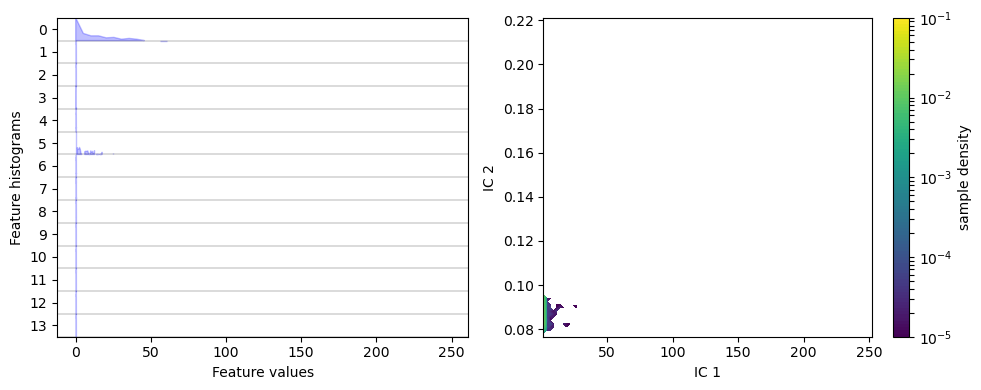

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    arr_concatenated,
    ax=axes[0],
#     feature_labels=['IC1', 'IC2', 'IC3'],
    ylog=True, ignore_dim_warning=True)
pyemma.plots.plot_density(*arr_concatenated[:, :2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()
# plt.savefig('tica_update.png', dpi= 300)

In [69]:
transformed_data

[array([[1.31877488e-03, 1.52015341e-02, 9.74150658e-01, 1.47839950e-03,
         7.33502535e-03, 5.15616150e-04],
        [3.98803782e-03, 2.57900115e-02, 9.58093941e-01, 1.15828076e-03,
         1.03752939e-02, 5.94448531e-04],
        [2.72779376e-03, 2.89763901e-02, 9.46767390e-01, 7.79233000e-04,
         2.01079417e-02, 6.41264196e-04],
        ...,
        [8.98523390e-01, 5.56049123e-03, 8.94088205e-03, 1.53195811e-02,
         6.53127730e-02, 6.34282641e-03],
        [9.32383001e-01, 4.55910526e-03, 7.05300644e-03, 1.35597475e-02,
         3.72078419e-02, 5.23729436e-03],
        [9.56233799e-01, 3.11525702e-03, 6.01274893e-03, 1.21255144e-02,
         1.88228115e-02, 3.68984207e-03]], dtype=float32),
 array([[2.1143591e-03, 2.7232988e-02, 9.4462061e-01, 5.6556525e-04,
         2.4859374e-02, 6.0702197e-04],
        [5.9946612e-03, 2.5600189e-02, 9.5048714e-01, 1.3476339e-03,
         1.5980924e-02, 5.8954611e-04],
        [2.7927076e-03, 2.4425339e-02, 9.5501685e-01, 9.747732

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not [array([[1.31877488e-03, 1.52015341e-02, 9.74150658e-01, 1.47839950e-03,
        7.33502535e-03, 5.15616150e-04],
       [3.98803782e-03, 2.57900115e-02, 9.58093941e-01, 1.15828076e-03,
        1.03752939e-02, 5.94448531e-04],
       [2.72779376e-03, 2.89763901e-02, 9.46767390e-01, 7.79233000e-04,
        2.01079417e-02, 6.41264196e-04],
       ...,
       [8.98523390e-01, 5.56049123e-03, 8.94088205e-03, 1.53195811e-02,
        6.53127730e-02, 6.34282641e-03],
       [9.32383001e-01, 4.55910526e-03, 7.05300644e-03, 1.35597475e-02,
        3.72078419e-02, 5.23729436e-03],
       [9.56233799e-01, 3.11525702e-03, 6.01274893e-03, 1.21255144e-02,
        1.88228115e-02, 3.68984207e-03]], dtype=float32), array([[2.1143591e-03, 2.7232988e-02, 9.4462061e-01, 5.6556525e-04,
        2.4859374e-02, 6.0702197e-04],
       [5.9946612e-03, 2.5600189e-02, 9.5048714e-01, 1.3476339e-03,
        1.5980924e-02, 5.8954611e-04],
       [2.7927076e-03, 2.4425339e-02, 9.5501685e-01, 9.7477320e-04,
        1.6180327e-02, 6.1006256e-04],
       ...,
       [1.2626129e-04, 1.2409694e-02, 9.6697666e-02, 1.6631195e-04,
        8.8937479e-01, 1.2252636e-03],
       [1.0987518e-05, 2.8743914e-03, 1.2562784e-02, 5.9655238e-05,
        9.8388463e-01, 6.0754927e-04],
       [7.5326798e-06, 1.0691660e-03, 3.6513745e-03, 7.9436359e-05,
        9.9467105e-01, 5.2133662e-04]], dtype=float32), array([[4.4285422e-03, 2.8426388e-02, 9.4366252e-01, 9.5489388e-04,
        2.1862557e-02, 6.6508161e-04],
       [1.8684849e-03, 2.8045127e-02, 9.4890761e-01, 5.9380720e-04,
        1.9956799e-02, 6.2814966e-04],
       [1.8300145e-03, 2.6621753e-02, 9.4497782e-01, 4.6525392e-04,
        2.5477989e-02, 6.2712491e-04],
       ...,
       [1.2423158e-04, 7.4265129e-04, 1.0716855e-03, 3.3663627e-04,
        9.9656528e-01, 1.1595421e-03],
       [9.1228873e-04, 2.2292917e-03, 4.1581439e-03, 6.8689446e-04,
        9.9016726e-01, 1.8460875e-03],
       [2.5802668e-05, 9.7372918e-04, 1.9190741e-03, 8.5968386e-05,
        9.9643046e-01, 5.6500820e-04]], dtype=float32), array([[1.3187749e-03, 1.5201534e-02, 9.7415066e-01, 1.4783995e-03,
        7.3350254e-03, 5.1561615e-04],
       [8.4394133e-03, 2.6562044e-02, 9.5207489e-01, 1.7801379e-03,
        1.0550061e-02, 5.9340219e-04],
       [4.2928779e-03, 2.3265619e-02, 9.5570391e-01, 1.1934051e-03,
        1.5020371e-02, 5.2388135e-04],
       ...,
       [8.8366501e-02, 2.9111214e-02, 8.5033911e-01, 1.3953813e-02,
        1.7488101e-02, 7.4126414e-04],
       [8.5231580e-02, 2.7497791e-02, 8.5806358e-01, 1.4869259e-02,
        1.3629556e-02, 7.0826570e-04],
       [8.8626578e-02, 3.9374430e-02, 8.3490014e-01, 1.4050289e-02,
        2.2121880e-02, 9.2671876e-04]], dtype=float32), array([[3.1642765e-03, 3.6358282e-02, 9.3169361e-01, 6.0140772e-04,
        2.7418386e-02, 7.6400611e-04],
       [2.2317483e-03, 3.5390224e-02, 9.2730623e-01, 5.6020549e-04,
        3.3761967e-02, 7.4954552e-04],
       [2.8789153e-03, 3.4167163e-02, 9.2946845e-01, 6.5353466e-04,
        3.2076217e-02, 7.5568591e-04],
       ...,
       [1.6008226e-14, 6.2916668e-05, 5.9583178e-09, 3.8601069e-05,
        5.7836922e-07, 9.9989784e-01],
       [3.6714969e-15, 7.6473974e-05, 3.1166103e-09, 9.7343200e-06,
        1.5475983e-07, 9.9991357e-01],
       [2.1457166e-15, 2.3435836e-05, 9.9192599e-10, 2.5756564e-05,
        2.3967863e-07, 9.9995053e-01]], dtype=float32), array([[3.6121928e-03, 1.9423109e-02, 9.5909768e-01, 1.0921888e-03,
        1.6312305e-02, 4.6249252e-04],
       [1.7862363e-03, 2.6862279e-02, 9.3460000e-01, 6.9375883e-04,
        3.5323944e-02, 7.3374837e-04],
       [2.5782967e-03, 2.7307713e-02, 9.5304883e-01, 7.2699966e-04,
        1.5719900e-02, 6.1828591e-04],
       ...,
       [9.7775799e-01, 1.5364939e-03, 8.4685553e-03, 8.6621819e-03,
        2.2975812e-03, 1.2772453e-03],
       [9.7813636e-01, 1.5055856e-03, 8.6550992e-03, 8.4330589e-03,
        2.0046209e-03, 1.2652152e-03],
       [9.7533119e-01, 1.5258067e-03, 9.7426157e-03, 9.7483126e-03,
        2.2685584e-03, 1.3835459e-03]], dtype=float32), array([[3.61219281e-03, 1.94231085e-02, 9.59097683e-01, 1.09218876e-03,
        1.63123049e-02, 4.62492520e-04],
       [6.45916385e-04, 2.26434730e-02, 9.50954020e-01, 4.82014933e-04,
        2.45637782e-02, 7.10761175e-04],
       [1.66768825e-03, 2.62057297e-02, 9.54888105e-01, 4.96841443e-04,
        1.61616001e-02, 5.79992135e-04],
       ...,
       [4.78913425e-05, 1.60263234e-03, 3.78351635e-03, 1.02728416e-04,
        9.93764639e-01, 6.98533258e-04],
       [2.69637658e-05, 9.92081710e-04, 1.95661210e-03, 1.07895699e-04,
        9.96282399e-01, 6.34110707e-04],
       [7.55892615e-05, 1.00096432e-03, 1.87743036e-03, 2.07203761e-04,
        9.95991051e-01, 8.47772637e-04]], dtype=float32), array([[3.6121928e-03, 1.9423109e-02, 9.5909768e-01, 1.0921888e-03,
        1.6312305e-02, 4.6249252e-04],
       [6.9537451e-03, 2.9948659e-02, 9.3839192e-01, 1.5344851e-03,
        2.2481801e-02, 6.8941520e-04],
       [3.9905109e-03, 3.6917560e-02, 9.3664902e-01, 8.9287618e-04,
        2.0816397e-02, 7.3361082e-04],
       ...,
       [9.5851851e-07, 6.5028507e-06, 1.3723082e-05, 1.7104112e-03,
        9.9782121e-01, 4.4729386e-04],
       [5.1456180e-07, 5.5976393e-06, 1.1965353e-05, 2.3677782e-03,
        9.9701166e-01, 6.0243689e-04],
       [1.1149094e-06, 9.5216546e-06, 2.2697272e-05, 2.8466694e-03,
        9.9647117e-01, 6.4889767e-04]], dtype=float32), array([[3.6121928e-03, 1.9423109e-02, 9.5909768e-01, 1.0921888e-03,
        1.6312305e-02, 4.6249252e-04],
       [2.9941832e-03, 2.0935725e-02, 9.6065843e-01, 1.0028029e-03,
        1.3860975e-02, 5.4779847e-04],
       [2.7279276e-03, 2.9405825e-02, 9.4984496e-01, 7.4094266e-04,
        1.6620232e-02, 6.6011259e-04],
       ...,
       [9.6939129e-01, 1.4540146e-03, 4.5328783e-03, 1.5052720e-02,
        6.8133771e-03, 2.7558175e-03],
       [9.6343297e-01, 1.4168029e-03, 5.7688090e-03, 1.7898463e-02,
        8.8926107e-03, 2.5903850e-03],
       [9.6425915e-01, 1.5368420e-03, 5.8844560e-03, 1.6383106e-02,
        9.3068685e-03, 2.6296228e-03]], dtype=float32)]

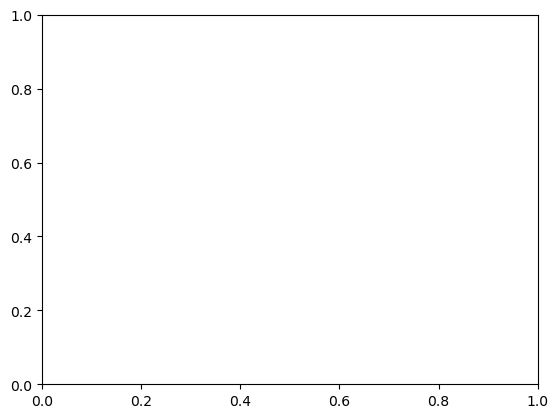

In [70]:
for i in range(6):
    plt.scatter(*arr_concatenated[:,:2].T, c=transformed_data[:,i], s=0.5)
    plt.show()

In [81]:
colorcode = np.argmax(t_cont, axis=1)

In [ ]:
plt.scatter(*dihedral.T, c=colorcode, s=0.5)
plt.show()

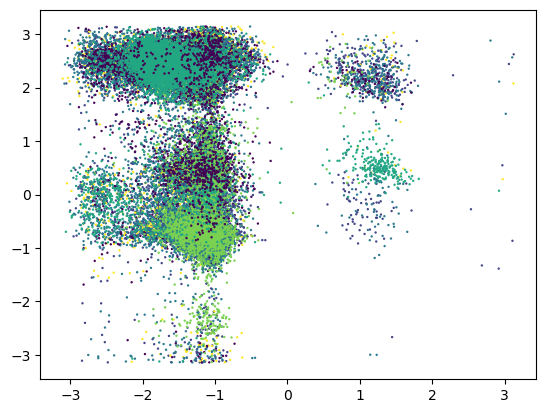

In [83]:
plt.scatter(*arr_concatenated[:,:2].T,c=colorcode, s=0.5)
plt.show()

In [10]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import mdshare  # for trajectory data

from tqdm.notebook import tqdm  # progress bar

In [11]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    torch.backends.cudnn.benchmark = True
else:
    device = torch.device("cpu")
torch.set_num_threads(12)

print(f"Using device {device}")

Using device cuda


In [20]:
topfile = mdshare.fetch('alanine-dipeptide-nowater.pdb', working_directory='data')

In [19]:
ala_coords_file = mdshare.fetch(
    "alanine-dipeptide-3x250ns-heavy-atom-positions.npz", working_directory="data"
)
with np.load(ala_coords_file) as fh:
    data = fh["arr_0"]

dihedral_file = mdshare.fetch(
    "alanine-dipeptide-3x250ns-backbone-dihedrals.npz", working_directory="data"
)
with np.load(dihedral_file) as fh:
    dihedral = fh["arr_0"]

In [68]:
np.shape(dihedral)

(250000, 2)

In [33]:
ala_coords_file = mdshare.fetch(
    "alanine-dipeptide-3x250ns-heavy-atom-positions.npz", working_directory="data"
)
with np.load(ala_coords_file) as fh:
    data = [fh[f"arr_{i}"].astype(np.float32) for i in range(3)]

dihedral_file = mdshare.fetch(
    "alanine-dipeptide-3x250ns-backbone-dihedrals.npz", working_directory="data"
)
with np.load(dihedral_file) as fh:
    dihedral = [fh[f"arr_{i}"] for i in range(3)]

In [12]:
np.shape(data)

(2502, 1881)

In [12]:
# from deeptime.util.data import TrajectoryDataset, TrajectoriesDataset

In [38]:
# dataset=TrajectoryDataset(lagtime=1, trajectory=heavy.astype(np.float32))

In [11]:
from deeptime.util.data import TrajectoryDataset, TrajectoriesDataset

dataset = TrajectoriesDataset.from_numpy(10, result)

In [12]:
np.shape(dataset)

(98284, 2, 630)

In [13]:
np.shape(result[0])

(10001, 630)

In [14]:
n_val = int(len(dataset)*.1)
train_data, val_data = torch.utils.data.random_split(dataset, [len(dataset) - n_val, n_val])

In [272]:
np.shape(dataset)

(98365, 2, 203)

In [271]:
np.shape(train_data)

(78692, 2, 203)

In [17]:
arr5[0].shape[1]

14

In [18]:
lobe = nn.Sequential(
    nn.BatchNorm1d(result[0].shape[1]),
    nn.Linear(result[0].shape[1], 20), nn.ELU(),
    nn.Linear(20, 20), nn.ELU(),
    nn.Linear(20, 20), nn.ELU(),
    nn.Linear(20, 20), nn.ELU(),
    nn.Linear(20, 20), nn.ELU(),
    nn.Linear(20, 6),
    nn.Softmax(dim=1)  # obtain fuzzy probability distribution over output states
)

lobe = lobe.to(device=device)
print(lobe)

Sequential(
  (0): BatchNorm1d(630, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (1): Linear(in_features=630, out_features=20, bias=True)
  (2): ELU(alpha=1.0)
  (3): Linear(in_features=20, out_features=20, bias=True)
  (4): ELU(alpha=1.0)
  (5): Linear(in_features=20, out_features=20, bias=True)
  (6): ELU(alpha=1.0)
  (7): Linear(in_features=20, out_features=20, bias=True)
  (8): ELU(alpha=1.0)
  (9): Linear(in_features=20, out_features=20, bias=True)
  (10): ELU(alpha=1.0)
  (11): Linear(in_features=20, out_features=6, bias=True)
  (12): Softmax(dim=1)
)


In [19]:
from deeptime.decomposition.deep import VAMPNet

vampnet = VAMPNet(lobe=lobe, learning_rate=5e-3, device=device)

In [75]:
from torch.utils.data import DataLoader

loader_train = DataLoader(train_data, batch_size=10000, shuffle=True)
loader_val = DataLoader(val_data, batch_size=len(val_data), shuffle=False)

ValueError: num_samples should be a positive integer value, but got num_samples=0

In [21]:
model = vampnet.fit(loader_train, n_epochs=40,
                    validation_loader=loader_val, progress=tqdm).fetch_model()

VAMPNet epoch:   0%|          | 0/40 [00:00<?, ?it/s]

In [22]:
model

VAMPNetModel-22439085313040:[{'device': None,
                             'dtype': None,
                             'lobe': Sequential(
                              (0): BatchNorm1d(630, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                              (1): Linear(in_features=630, out_features=20, bias=True)
                              (2): ELU(alpha=1.0)
                              (3): Linear(in_features=20, out_features=20, bias=True)
                              (4): ELU(alpha=1.0)
                              (5): Linear(in_features=20, out_features=20, bias=True)
                              (6): ELU(alpha=1.0)
                              (7): Linear(in_features=20, out_features=20, bias=True)
                              (8): ELU(alpha=1.0)
                              (9): Linear(in_features=20, out_features=20, bias=True)
                              (10): ELU(alpha=1.0)
                              (11): Linear(in_features=20, out_

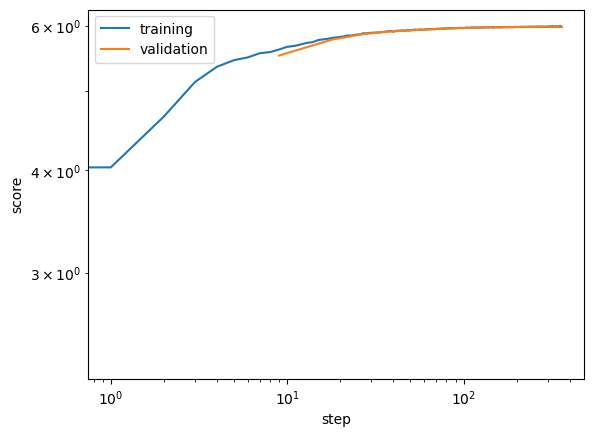

In [23]:
plt.loglog(*vampnet.train_scores.T, label='training')
plt.loglog(*vampnet.validation_scores.T, label='validation')
plt.xlabel('step')
plt.ylabel('score')
plt.legend();

In [24]:
transformed_data = model.transform(result)

In [25]:
t_cont = np.concatenate(transformed_data)

In [26]:
np.shape(arr5[4])

(15271, 14)

In [27]:
np.shape(transformed_data[4])

(15271, 6)

In [23]:
state_probabilities = model.transform(arr2)

# f, axes = plt.subplots(3, 2, figsize=(12, 16))
# for i, ax in enumerate(axes.flatten()):
#     ax.scatter(*tica_output[0][::5].T, c=state_probabilities[..., i][::5])
#     ax.set_title(f'State {i+1}')

In [24]:
state_probabilities_sample = state_probabilities[0]

In [26]:
N_time_steps = state_probabilities_sample.shape[0]
N_states = state_probabilities_sample.shape[1]

populations = np.zeros(N_states)

for i in range(N_states):
    for t in range(N_time_steps):
        populations[i] += state_probabilities_sample[t, i]
    populations[i] /= N_time_steps

populations /= populations.sum()


In [27]:
populations

array([0.93925455, 0.00318972, 0.0410701 , 0.00818703, 0.00706747,
       0.00123114])

In [130]:
state_probabilities = model.transform(torsions_data[2])
for ix, (mini, maxi) in enumerate(zip(np.min(state_probabilities, axis=0),
                                      np.max(state_probabilities, axis=0))):
    print(f"State {ix+1}: [{mini}, {maxi}]")

State 1: [0.0029572201892733574, 0.5357660055160522]
State 2: [0.011738091707229614, 0.4521355926990509]
State 3: [0.013777454383671284, 0.6091873049736023]
State 4: [0.009225696325302124, 0.7554965019226074]
State 5: [0.005248998291790485, 0.8555597066879272]
State 6: [0.028350427746772766, 0.8016685843467712]


In [131]:
np.shape(tica_output)

(3,)

In [132]:
np.shape(state_probabilities)

(1001, 6)

In [30]:
assignments = t_cont.argmax(1)

In [33]:
np.shape(assignments)

(98374,)

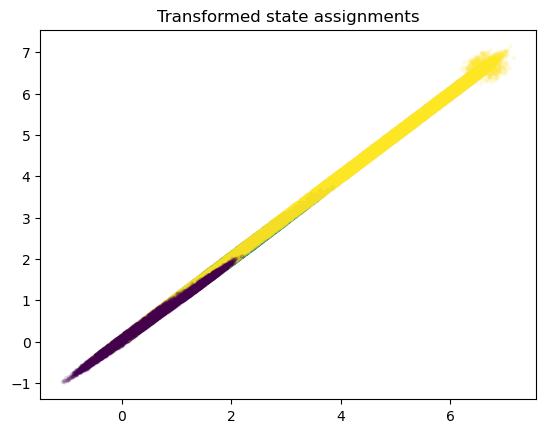

In [31]:
# assignments = state_probabilities.argmax(1)
plt.scatter(*arr_concatenated[:, :2].T, c=assignments, s=5, alpha=.1)
plt.title('Transformed state assignments');

In [38]:
np.shape(t_cont)

(98374, 3)

In [55]:
import pyemma.coordinates as coords

# Number of cluster centers
n_clustercenters = 25

# Perform k-means clustering
clustering = coords.cluster_kmeans(transformed_data, k=n_clustercenters, max_iter=50)

# Discrete trajectories
dtrajs = clustering.dtrajs


initialize kmeans++ centers:   0%|                       | 0/25 [00:00<?, ?it/s]

kmeans iterations:   0%|                                 | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|                 | 0/9 [00:00<?, ?it/s]

In [56]:
dtrajs_concatenated = np.concatenate(dtrajs)

estimating BayesianMSM:   0%|                             | 0/6 [00:00<?, ?it/s]

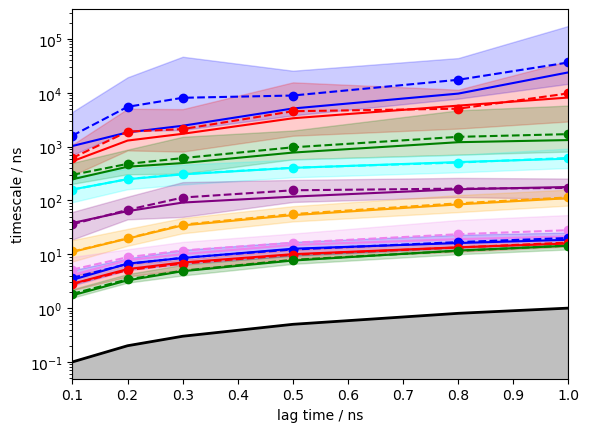

In [57]:
its = pyemma.msm.its(dtrajs, lags=10, nits=10, errors='bayes')
pyemma.plots.plot_implied_timescales(its, units='ns', dt=0.1);
# plt.savefig('its_update.png',dpi=300)

In [35]:
msm_estimator = msm.estimate_markov_model(dtrajs, lag=100)

# Compute implied timescales
its = msm_estimator.timescales()

print(its)


NameError: name 'msm' is not defined

estimating MaximumLikelihoodMSM:   0%|                    | 0/9 [00:00<?, ?it/s]

(<Figure size 900x900 with 9 Axes>,
 array([[<Axes: ylabel='probability'>, <Axes: >, <Axes: >],
        [<Axes: ylabel='probability'>, <Axes: >, <Axes: >],
        [<Axes: xlabel='lag time (steps)', ylabel='probability'>,
         <Axes: xlabel='lag time (steps)'>,
         <Axes: xlabel='lag time (steps)'>]], dtype=object))

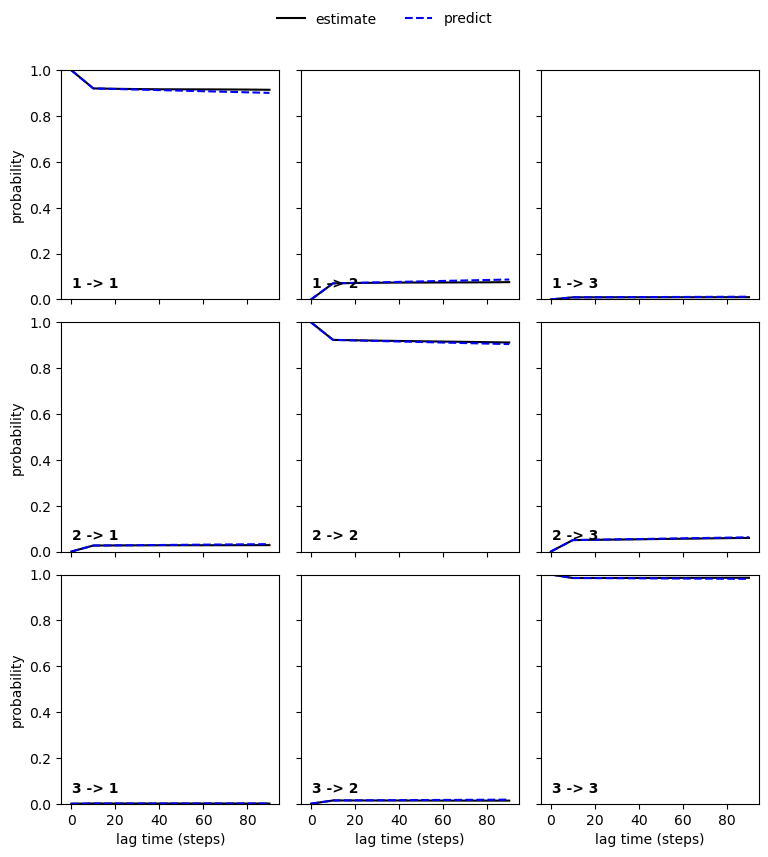

In [47]:
ck_test = msm_estimator.cktest(nsets=3)
pyemma.plots.plot_cktest(ck_test)

In [55]:
msm

BayesianMSM(conf=0.95, connectivity='largest', core_set=None,
      count_mode='effective', dt_traj='0.1 ns', lag=50,
      milestoning_method='last_core', mincount_connectivity='1/n',
      nsamples=100, nsteps=10, reversible=True, show_progress=True,
      sparse=False, statdist_constraint=None)

In [61]:
msm = pyemma.msm.bayesian_markov_model(dtrajs, lag=1, dt_traj='0.1 ns')
print('fraction of states used = {:.2f}'.format(msm.active_state_fraction))
print('fraction of counts used = {:.2f}'.format(msm.active_count_fraction))

pyemma.msm.estimators.bayesian_msm.BayesianMSM[90]: compute stat. inefficiencies

pyemma.msm.estimators.bayesian_msm.BayesianMSM[90]: Sampling MSMs:   0%| | 0/100

fraction of states used = 1.00
fraction of counts used = 1.00


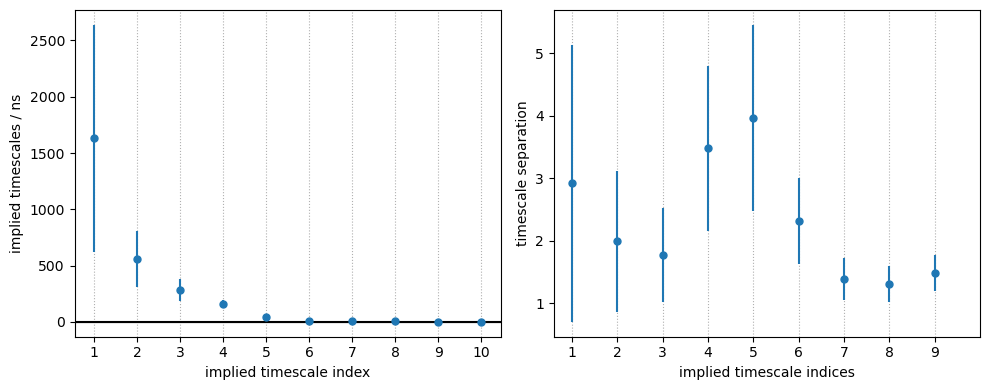

In [62]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)


nits = 10

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean,
    yerr=timescales_std,
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:],
    yerr=its_separation_err(
        timescales_mean,
        timescales_std),
    fmt='.',
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')

axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
# axes[1].set_xticklabels(
#     ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits + 2)],
#     rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')
fig.tight_layout()
# plt.savefig('spectral_update.png',dpi=300)

estimating BayesianMSM:   0%|                             | 0/9 [00:00<?, ?it/s]

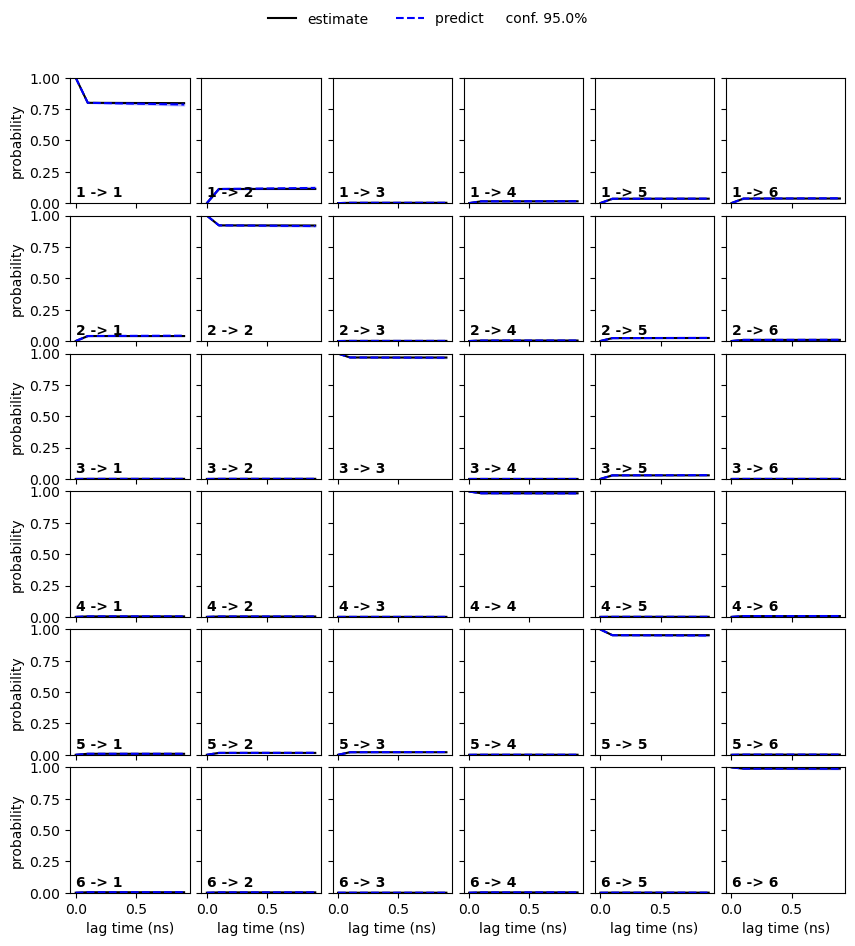

In [63]:
nstates = 6
cktest = msm.cktest(nstates)
pyemma.plots.plot_cktest(cktest, dt=0.1, units='ns');
# plt.savefig('cktets.png',dpi = 300)

In [64]:
tica_dev = pyemma.coordinates.tica(result,lag=1, dim=2)
tica_out = tica_dev.get_output()
tica_concatenated = np.concatenate(tica_out)

calculate covariances:   0%|                              | 0/9 [00:00<?, ?it/s]

getting output of TICA:   0%|                             | 0/9 [00:00<?, ?it/s]

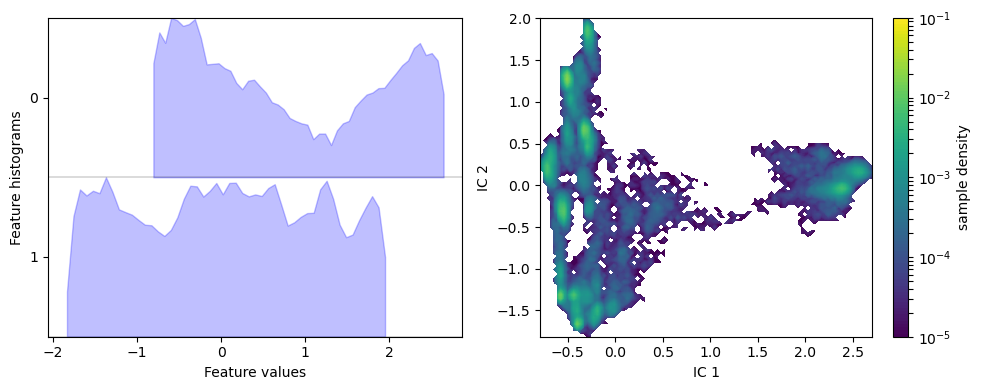

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    tica_concatenated,
    ax=axes[0],
#     feature_labels=['IC1', 'IC2', 'IC3'],
    ylog=True, ignore_dim_warning=True)
pyemma.plots.plot_density(*tica_concatenated[:, :2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()
# plt.savefig('tica_update.png', dpi= 300)

The first eigenvector is one: True (min=0.9999999999968677, max=1.000000000008165)


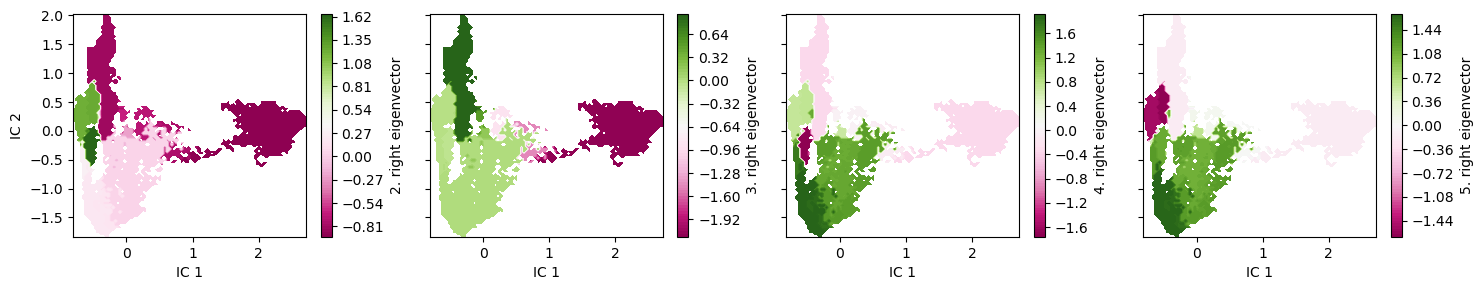

In [66]:
eigvec = msm.eigenvectors_right()
print('The first eigenvector is one: {} (min={}, max={})'.format(
    np.allclose(eigvec[:, 0], 1, atol=1e-15), eigvec[:, 0].min(), eigvec[:, 0].max()))

fig, axes = plt.subplots(1, 4, figsize=(15, 3), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *tica_concatenated[:, :2].T,
        eigvec[dtrajs_concatenated, i + 1],
        ax=ax,
        cmap='PiYG',
        cbar_label='{}. right eigenvector'.format(i + 2),
        mask=True)
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
fig.tight_layout()
# plt.savefig('righ_eigen.png',dpi=300)

In [67]:
mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = msm.mfpt(
            msm.metastable_sets[i],
            msm.metastable_sets[j])

from pandas import DataFrame
print('MFPT / steps:')
DataFrame(np.round(mfpt, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))

MFPT / steps:


,1,2,3,4,5,6
1,0.00,106.63,3175.63,2132.90,2047.42,415.83
2,288.69,0.00,3040.09,2285.74,1882.63,591.48
3,1370.10,990.03,0.00,3273.41,548.56,1529.29
4,1264.16,1232.18,4223.45,0.00,3137.18,735.11
5,1074.78,659.29,1380.60,3022.79,0.00,1295.74
6,1228.68,1222.94,4159.97,2039.72,3092.22,0.00


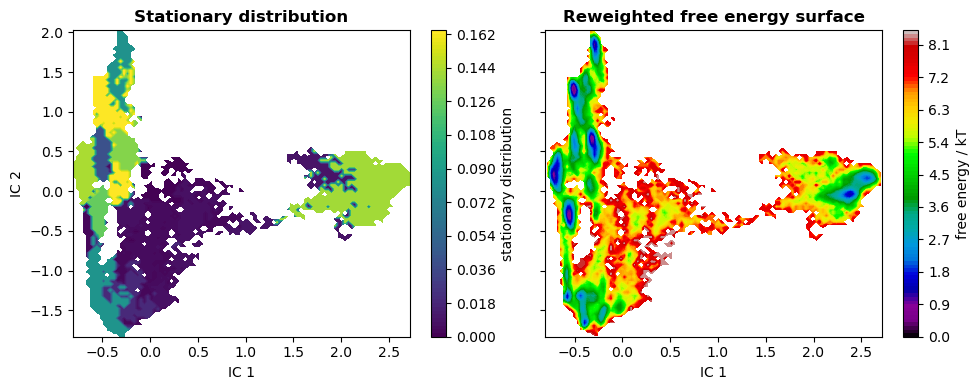

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
pyemma.plots.plot_contour(
    *tica_concatenated[:, :2].T,
    msm.pi[dtrajs_concatenated],
    ax=axes[0],
    mask=True,
    cbar_label='stationary distribution')
pyemma.plots.plot_free_energy(
    *tica_concatenated[:, :2].T,
    weights=np.concatenate(msm.trajectory_weights()),
    ax=axes[1],
    legacy=False)
for ax in axes.flat:
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
axes[0].set_title('Stationary distribution', fontweight='bold')
axes[1].set_title('Reweighted free energy surface', fontweight='bold')
fig.tight_layout()
# plt.savefig('macro_energy_update.png',dpi=400)

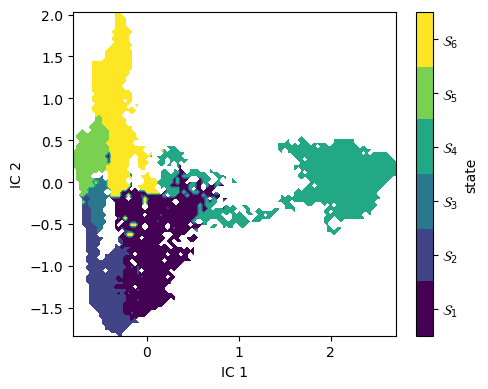

In [69]:
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax)
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates)])
fig.tight_layout()
# fig.savefig('pcca_update.png',dpi=400)

In [43]:
print(msm_estimator.stationary_distribution)

[1.18153754e-02 5.86030407e-02 1.06640375e-02 7.05558940e-04
 7.43065096e-03 3.01930267e-04 3.89577900e-04 1.37776875e-03
 2.76568048e-02 6.54593992e-02 1.24595407e-03 7.40416607e-04
 6.91327637e-04 5.35308543e-03 1.43096331e-02 4.32338841e-04
 3.47858770e-03 3.53930811e-03 1.75494532e-02 1.04783112e-02
 4.47982403e-04 6.12670389e-02 5.32203906e-04 5.14132197e-04
 6.31159255e-04 1.37112416e-04 1.45783544e-02 3.24178808e-02
 7.10433550e-04 4.96923101e-03 8.39493779e-04 2.40049468e-04
 1.94517134e-03 2.15937908e-03 9.41901271e-04 7.98719898e-04
 1.01377189e-03 4.74647959e-03 2.59753607e-04 3.97013157e-02
 1.49724171e-02 3.62282800e-04 1.63125353e-03 2.11284412e-04
 8.44253447e-03 3.49772679e-03 1.12290844e-02 8.89434811e-04
 8.62864239e-02 3.63851322e-03 1.05775024e-03 6.06875499e-04
 5.39899858e-04 1.30166265e-03 1.10095310e-03 2.83201653e-02
 1.33300575e-02 5.51995847e-02 1.12878360e-03 1.73889501e-03
 9.35074153e-03 5.12951256e-04 9.45962623e-03 6.51199115e-03
 3.97282897e-04 6.783499

In [44]:
A = [0]  # set of start states
B = [n_clustercenters-1]  # set of end states
tpt = msm.tpt(msm_estimator, A, B)

In [45]:
print(msm_estimator.eigenvalues())
print(msm_estimator.eigenvectors_right())


[ 1.00000000e+00  9.98431519e-01  9.95699870e-01  9.13344032e-01
  8.11068096e-01  7.87334325e-01  7.11987576e-01  6.80555910e-01
  6.63723382e-01  6.29379740e-01  6.06167564e-01  5.40325047e-01
  4.78824151e-01  4.53070444e-01  4.40698942e-01  4.14888386e-01
  3.83493877e-01  3.67013046e-01  3.40444574e-01  3.07697597e-01
  2.85823706e-01  2.76628605e-01  2.50916597e-01  2.34165362e-01
  2.24067424e-01  2.19756330e-01  2.05628677e-01  1.71657690e-01
  1.66209285e-01  1.60479261e-01  1.52966250e-01  1.38999977e-01
 -1.28696668e-01  1.17660320e-01  1.15272321e-01 -1.13034785e-01
  1.08842555e-01  1.05888777e-01  1.02495161e-01  9.79894190e-02
  9.16315123e-02  8.67146928e-02 -8.59263790e-02 -8.49827861e-02
  8.25327337e-02 -7.84949626e-02  7.70150482e-02 -7.59802527e-02
  7.26509328e-02  6.95525035e-02 -6.72291257e-02  6.59860676e-02
  6.31036931e-02 -6.04416136e-02  5.97111655e-02 -5.59982236e-02
  5.41545792e-02  4.89405793e-02  4.76768686e-02 -4.52515026e-02
 -4.47187194e-02  4.39584

In [38]:
import matplotlib.pyplot as plt
import numpy as np

eigenvalues = msm_estimator.eigenvalues()

plt.figure(figsize=(5,5))
plt.plot(eigenvalues, 'o')
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()


NameError: name 'msm_estimator' is not defined

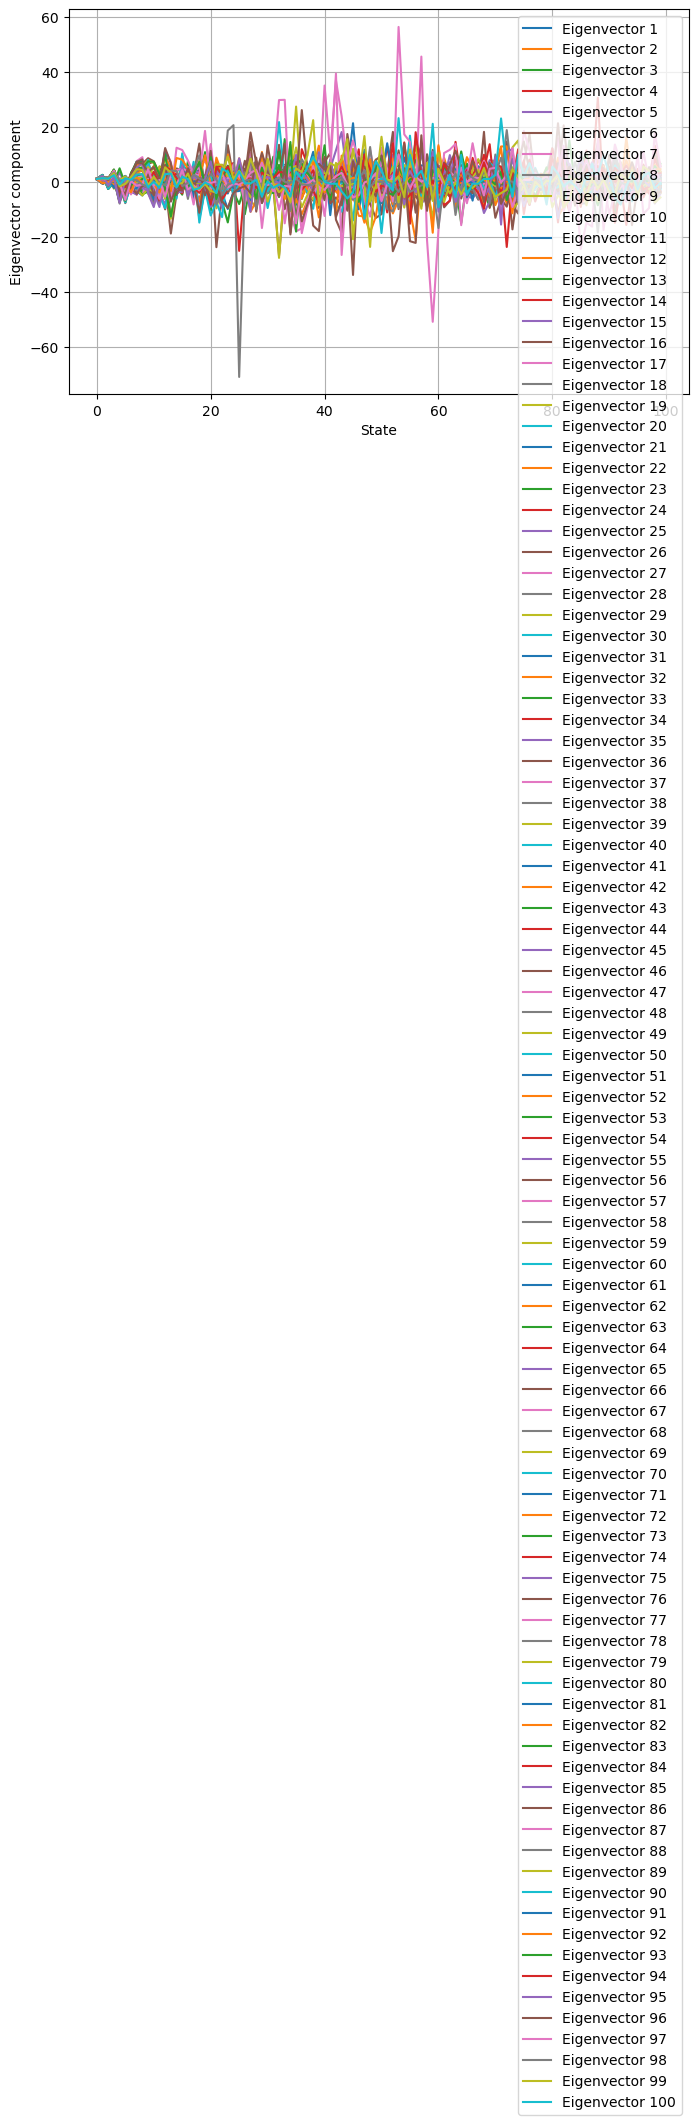

In [49]:
eigenvectors = msm_estimator.eigenvectors_right()

plt.figure(figsize=(8,5))
for i in range(len(eigenvectors)):
    plt.plot(eigenvectors[i], label=f'Eigenvector {i+1}')
plt.xlabel('State')
plt.ylabel('Eigenvector component')
plt.legend()
plt.grid(True)
plt.show()


In [78]:
from deeptime.decomposition import VAMP

vamp_estimator = VAMP(lagtime=2, observable_transform=model)
vamp = vamp_estimator.fit(arr2).fetch_model()
print(f"VAMP-2 score under lag 10: s = {vamp.score(2).round(2)}")

VAMP-2 score under lag 10: s = 5.98


  0%|          | 0/4 [00:00<?, ?it/s]

Text(0, 0.5, 'timescale')

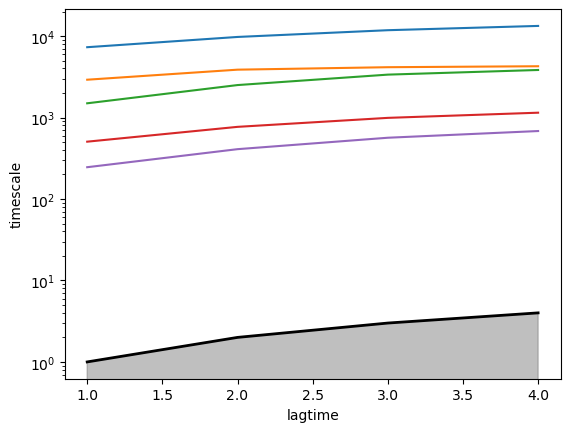

In [79]:
from deeptime.util.validation import implied_timescales, ck_test
from deeptime.plots import plot_implied_timescales, plot_ck_test

lagtimes = np.arange(1, 5, dtype=np.int32)
vamp_models = [VAMP(lagtime=lag, observable_transform=model).fit_fetch(arr2) for lag in tqdm(lagtimes)]

ax = plot_implied_timescales(implied_timescales(vamp_models))
ax.set_yscale('log')
ax.set_xlabel('lagtime')
ax.set_ylabel('timescale')

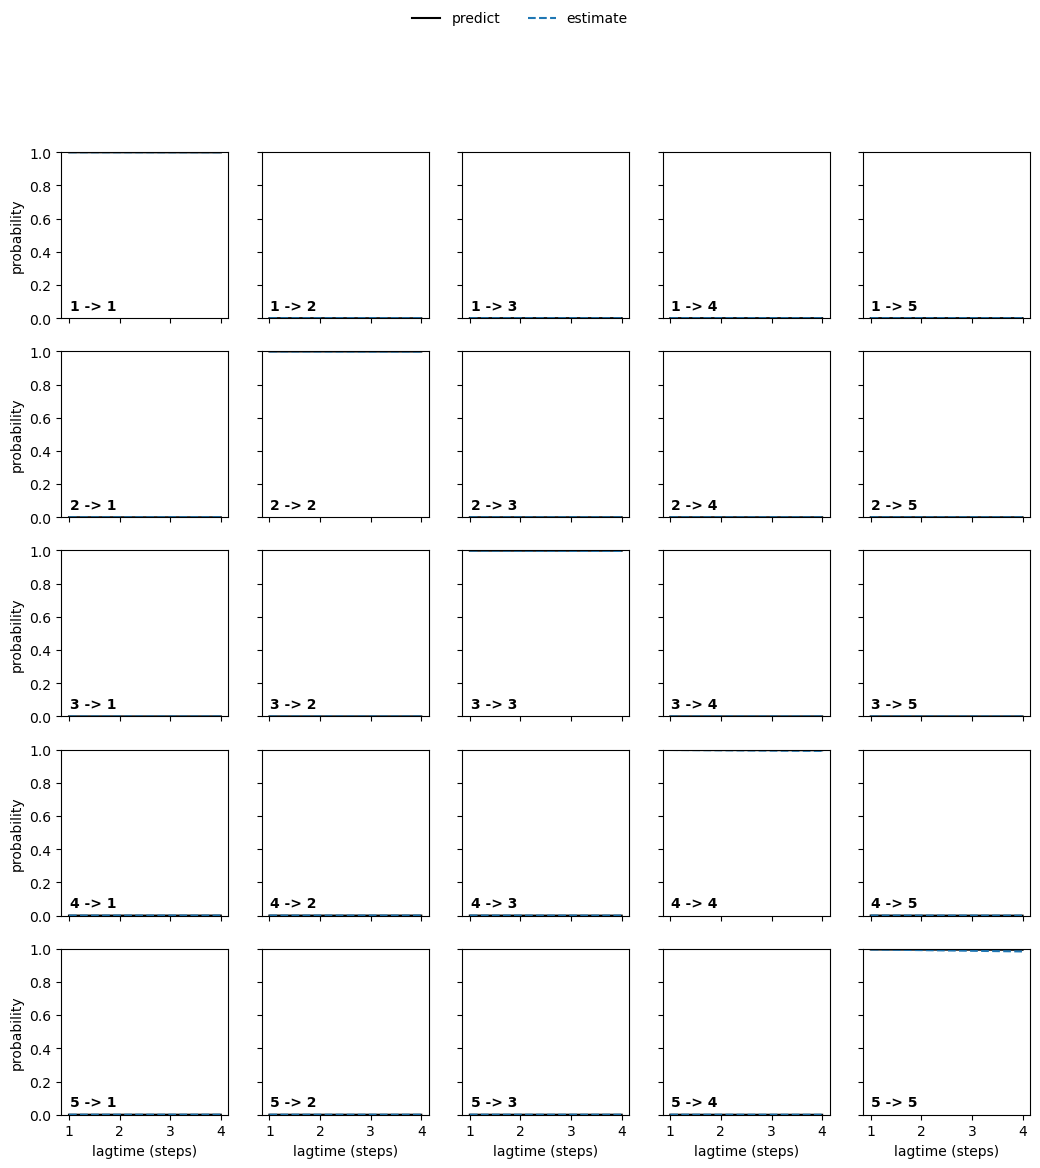

In [80]:
plot_ck_test(vamp_models[0].ck_test(vamp_models));

In [113]:
vamp = vamp_models[0]
print(vamp.lagtime)

1


In [12]:
device = torch.device("cuda")
torch.backends.cudnn.benchmark = True
torch.set_num_threads(12)

In [13]:
from deeptime.util.data import TrajectoryDataset, TrajectoriesDataset

dataset = TrajectoriesDataset.from_numpy(1, arr7)

In [14]:
n_val = int(len(dataset)*.2)

In [15]:
train_data, val_data = torch.utils.data.random_split(dataset, [len(dataset) - n_val, n_val])

In [16]:
np.shape(dataset)

(98365, 2, 203)

In [245]:
from deeptime.util.torch import MLP
lobe = MLP(units=[arr7[0].shape[1], 20, 10, 10, 10, 6], nonlinearity=nn.ReLU)

In [246]:
lobe

MLP(
  (_sequential): Sequential(
    (0): Linear(in_features=203, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): ReLU()
    (8): Linear(in_features=10, out_features=6, bias=True)
  )
)

In [247]:
lobe = lobe.to(device=device)

In [248]:
from deeptime.decomposition.deep import VAMPNet

vampnet = VAMPNet(lobe=lobe, learning_rate=1e-4, device=device)

In [249]:
from torch.utils.data import DataLoader

loader_train = DataLoader(train_data, batch_size=512, shuffle=True)
loader_val = DataLoader(val_data, batch_size=len(val_data), shuffle=False)

In [250]:
from tqdm.notebook import tqdm
model = vampnet.fit(loader_train, n_epochs=160,
                    validation_loader=loader_val, progress=tqdm).fetch_model()

VAMPNet epoch:   0%|          | 0/160 [00:00<?, ?it/s]

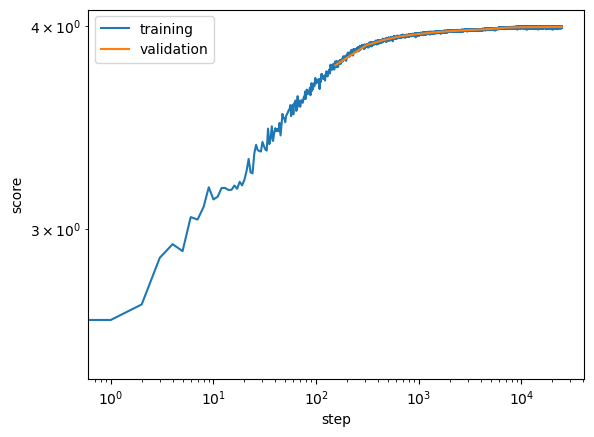

In [32]:
plt.loglog(*vampnet.train_scores.T, label='training')
plt.loglog(*vampnet.validation_scores.T, label='validation')
plt.xlabel('step')
plt.ylabel('score')
plt.legend();

In [246]:
np.shape(arr7[0])

(10001, 203)

In [247]:
np.shape(result[0])

(10001, 630)

In [33]:
transformed_data = model.transform(arr7)

In [34]:
np.shape(transformed_data)

(9,)

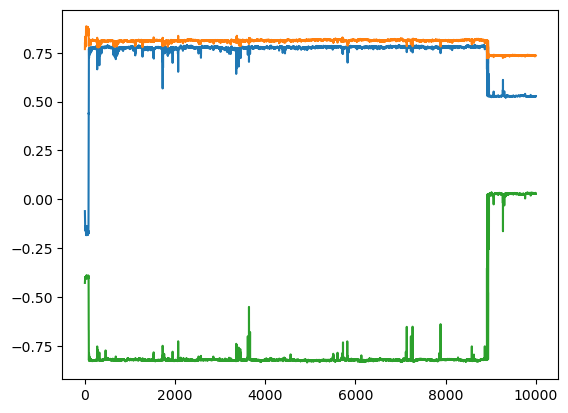

In [35]:
plt.plot(transformed_data[0])

In [232]:
import pyemma.coordinates as coords

# Number of cluster centers
n_clustercenters = 80

# Perform k-means clustering
clustering = coords.cluster_kmeans(transformed_data, k=n_clustercenters, max_iter=50)

# Discrete trajectories
dtrajs = clustering.dtrajs


initialize kmeans++ centers:   0%|                       | 0/80 [00:00<?, ?it/s]

kmeans iterations:   0%|                                 | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|                 | 0/9 [00:00<?, ?it/s]

In [112]:
dtrajs_concatenated = np.concatenate(dtrajs)

In [118]:
dtrajs

[array([159, 159,  22, ...,  86,  86,  86], dtype=int32),
 array([159,  71,   7, ..., 158, 158, 158], dtype=int32),
 array([ 71, 102,   7, ...,  86, 147,  86], dtype=int32),
 array([159, 159, 159, ..., 183, 183,  70], dtype=int32),
 array([ 71,   7, 191, ...,  47,  82,  26], dtype=int32),
 array([159, 143, 159, ...,  56, 169,  56], dtype=int32),
 array([159,  71, 140, ...,  86,  86,  86], dtype=int32),
 array([159, 115, 112, ...,   2,  93,   2], dtype=int32),
 array([159, 159,   7, ...,  36,  36, 147], dtype=int32)]

In [116]:
np.shape(dtrajs)

/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(9,)

estimating BayesianMSM:   0%|                            | 0/16 [00:00<?, ?it/s]

/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/msmtools/estimation/api.py:956: NotConvergedWarning: Reversible transition matrix estimation didn't converge.
  result = sparse.mle.mle_trev.mle_trev(C, **kwargs)


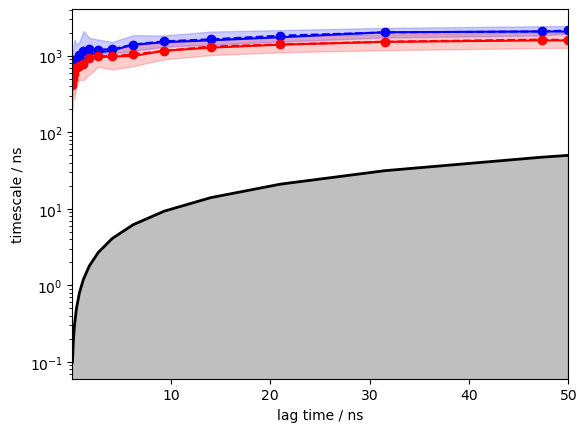

In [95]:
its = pyemma.msm.its(dtrajs, lags=500, nits=2, errors='bayes')
pyemma.plots.plot_implied_timescales(its, units='ns', dt=0.1);
# plt.savefig('its_update.png',dpi=300)

In [236]:
msm = pyemma.msm.bayesian_markov_model(dtrajs, lag=10, dt_traj='0.1 ns')
print('fraction of states used = {:.2f}'.format(msm.active_state_fraction))
print('fraction of counts used = {:.2f}'.format(msm.active_count_fraction))

pyemma.msm.estimators.bayesian_msm.BayesianMSM[117]: compute stat. inefficiencie

pyemma.msm.estimators.bayesian_msm.BayesianMSM[117]: Sampling MSMs:   0%| | 0/10

fraction of states used = 1.00
fraction of counts used = 1.00


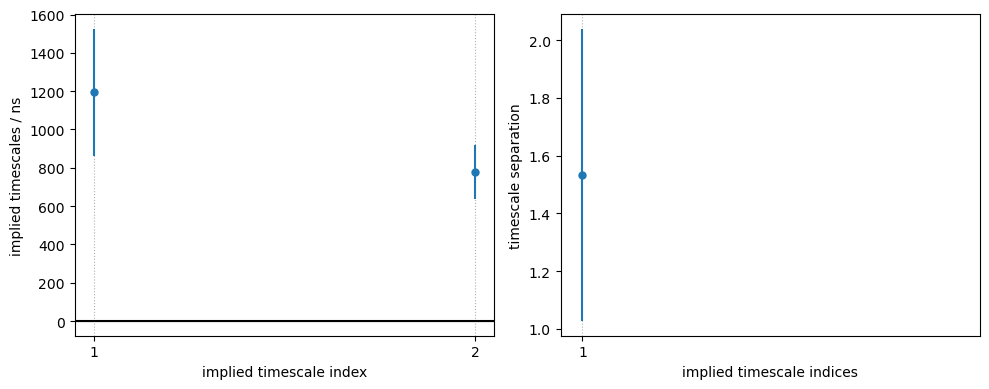

In [237]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)


nits = 2

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean,
    yerr=timescales_std,
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:],
    yerr=its_separation_err(
        timescales_mean,
        timescales_std),
    fmt='.',
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')

axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
# axes[1].set_xticklabels(
#     ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits + 2)],
#     rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')
fig.tight_layout()
# plt.savefig('spectral_update.png',dpi=300)

estimating BayesianMSM:   0%|                             | 0/9 [00:00<?, ?it/s]

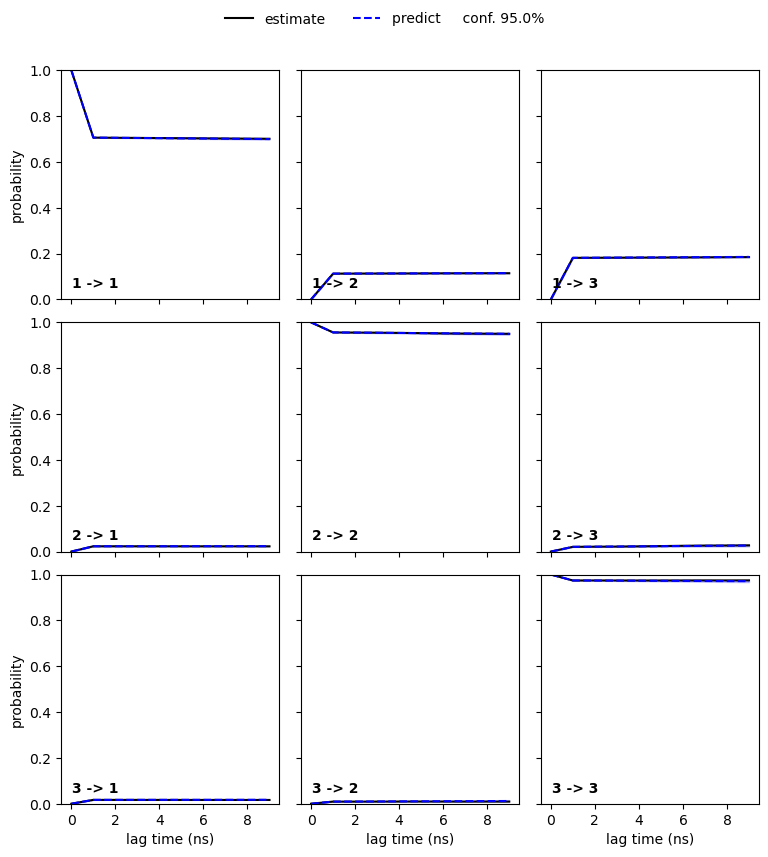

In [238]:
nstates = 3
cktest = msm.cktest(nstates)
pyemma.plots.plot_cktest(cktest, dt=0.1, units='ns');
# plt.savefig('cktets.png',dpi = 300)

In [239]:
tica_dev = pyemma.coordinates.tica(arr7,lag=10, dim=2)
tica_out = tica_dev.get_output()
tica_concatenated = np.concatenate(tica_out)

calculate covariances:   0%|                              | 0/9 [00:00<?, ?it/s]

getting output of TICA:   0%|                             | 0/9 [00:00<?, ?it/s]

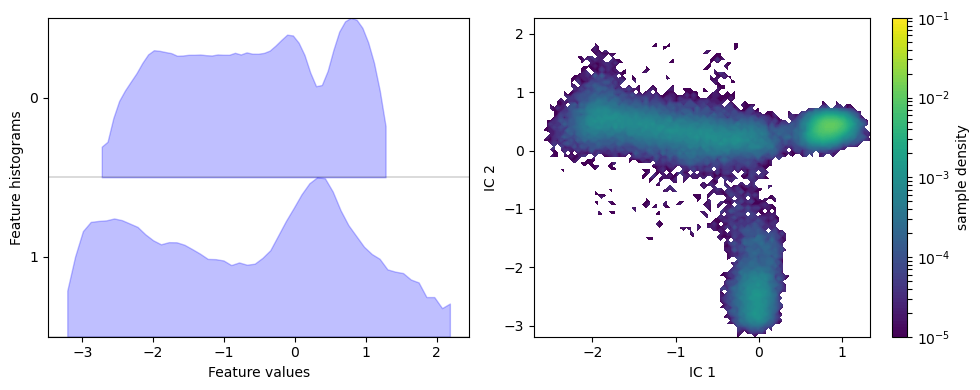

In [240]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    tica_concatenated,
    ax=axes[0],
#     feature_labels=['IC1', 'IC2', 'IC3'],
    ylog=True, ignore_dim_warning=True)
pyemma.plots.plot_density(*tica_concatenated[:, :2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()
# plt.savefig('tica_update.png', dpi= 300)

In [241]:
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax)
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates)])
fig.tight_layout()
# fig.savefig('pcca_update.png',dpi=400)

IndexError: index 159 is out of bounds for axis 0 with size 80

In [242]:
mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = msm.mfpt(
            msm.metastable_sets[i],
            msm.metastable_sets[j])

from pandas import DataFrame
print('MFPT / steps:')
DataFrame(np.round(mfpt, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))

MFPT / steps:


,1,2,3
1,0.00,1708.13,850.74
2,6573.28,0.00,1264.29
3,6843.26,2327.69,0.00


In [221]:
model

VAMPNetModel-22439125650064:[{'device': None,
                             'dtype': None,
                             'lobe': MLP(
                              (_sequential): Sequential(
                                (0): Linear(in_features=630, out_features=15, bias=True)
                                (1): ReLU()
                                (2): Linear(in_features=15, out_features=10, bias=True)
                                (3): ReLU()
                                (4): Linear(in_features=10, out_features=10, bias=True)
                                (5): ReLU()
                                (6): Linear(in_features=10, out_features=5, bias=True)
                                (7): ReLU()
                                (8): Linear(in_features=5, out_features=4, bias=True)
                              )
                            ),
                             'lobe_timelagged': MLP(
                              (_sequential): Sequential(
                        

In [51]:
import deeptime as dt
from deeptime.plots import plot_implied_timescales
from deeptime.util.validation import implied_timescales

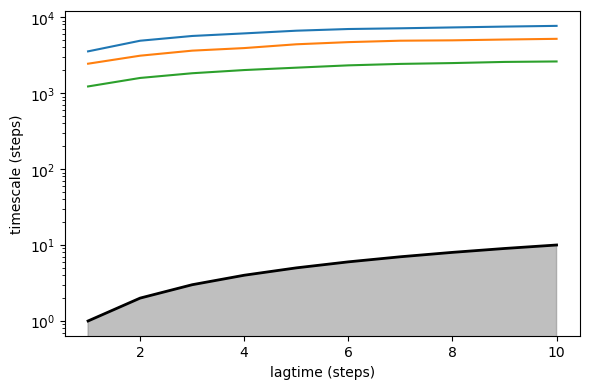

In [53]:
lagtimes = np.arange(1, 11)
its = implied_timescales([dt.decomposition.VAMP(lagtime=lag, observable_transform=model).fit(arr7).fetch_model() for lag in lagtimes])
fig, axes = plt.subplots(1, 1, figsize=(6, 4))

plot_implied_timescales(its, ax=axes)
axes.set_yscale('log')
axes.set_xlabel('lagtime (steps)')
axes.set_ylabel('timescale (steps)')
fig.tight_layout()

In [55]:
trans_cont = np.concatenate(transformed_data)

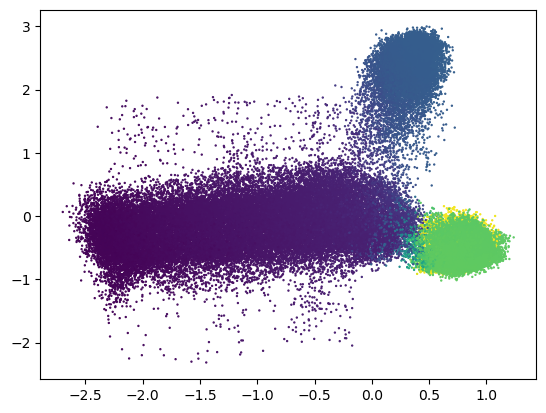

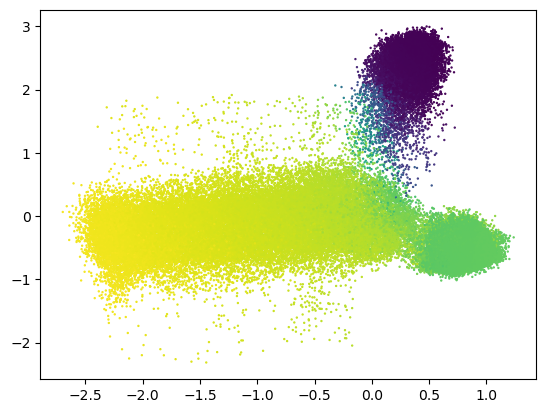

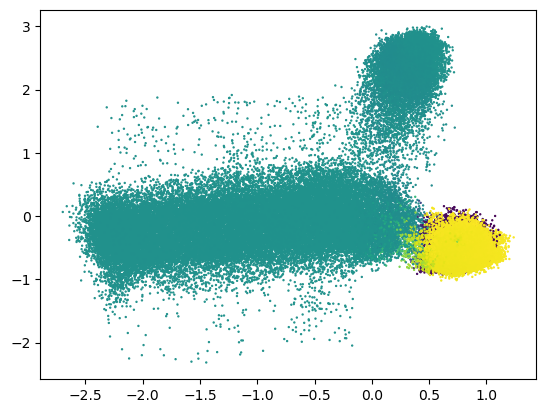

IndexError: index 3 is out of bounds for axis 1 with size 3

In [175]:
for i in range(4):
    plt.scatter(*tica_concatenated[:,:2].T, c=trans_cont[:,i], s=0.5)
    plt.show()

In [57]:
colorcode = np.argmax(trans_cont, axis=1)

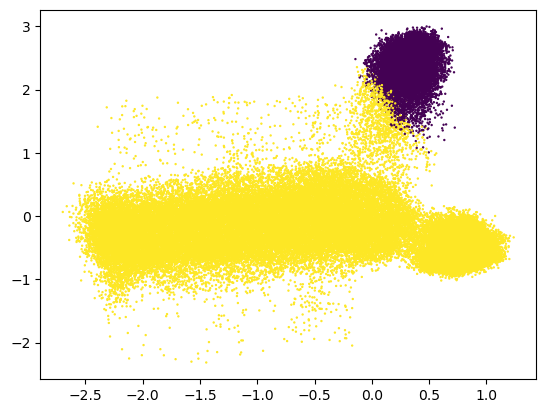

In [58]:
plt.scatter(*tica_concatenated.T, c=colorcode, s=0.5)
plt.show()

In [105]:
ptm=[dt.decomposition.VAMP(lagtime=10, observable_transform=model).fit(arr7).fetch_model() ]

In [127]:
from deeptime.markov.msm import BayesianMSM

In [ ]:
[dt.decomposition.VAMP(lagtime=lag, observable_transform=model).fit(arr7).fetch_model() for lag in lagtimes]

In [139]:
vamp_model_vnet = dt.decomposition.VAMP(lagtime=1, observable_transform=model).fit(arr7).fetch_model()

In [142]:
vamp_model_direct = dt.decomposition.VAMP(lagtime=1, dim=1).fit(arr7).fetch_model()

In [146]:
print(f'VAMPNet score {vamp_model_vnet.score(2):.5f}')
print(f'Direct VAMP score {vamp_model_direct.score(2):.5f}')

VAMPNet score 3.99698
Direct VAMP score 1.99455


In [150]:
arr7_conc = np.concatenate(arr7)

In [166]:
msm_estimator = dt.markov.msm.MaximumLikelihoodMSM(lagtime=10)
msm = msm_estimator.fit(dtraj_rec).fetch_model()

In [171]:
from deeptime.clustering import KMeans
from deeptime.markov.msm import MaximumLikelihoodMSM

projection = vamp_model_vnet.transform(arr7_conc)
dtraj_rec = KMeans(4).fit(projection).transform(projection)
msm = MaximumLikelihoodMSM().fit(dtraj_rec, lagtime=1).fetch_model()

In [172]:
print("estimated transition matrix", msm.transition_matrix)

estimated transition matrix [[9.97969134e-01 5.93806073e-04 1.11021060e-03 3.26849257e-04]
 [7.12065885e-04 9.99121344e-01 0.00000000e+00 1.66589744e-04]
 [3.05377050e-03 0.00000000e+00 9.96946229e-01 0.00000000e+00]
 [6.47425216e-04 2.75178707e-04 0.00000000e+00 9.99077396e-01]]


In [165]:
msm

MarkovStateModelCollection-22607701545744:[{'count_models': None,
                                           'reversible': True,
                                           'stationary_distributions': None,
                                           'transition_matrices': None,
                                           'transition_matrix_tolerance': 1e-06}]

In [169]:
 from deeptime.markov import TransitionCountEstimator
 from deeptime.markov.msm import BayesianMSM
 from deeptime.plots.chapman_kolmogorov import plot_ck_test

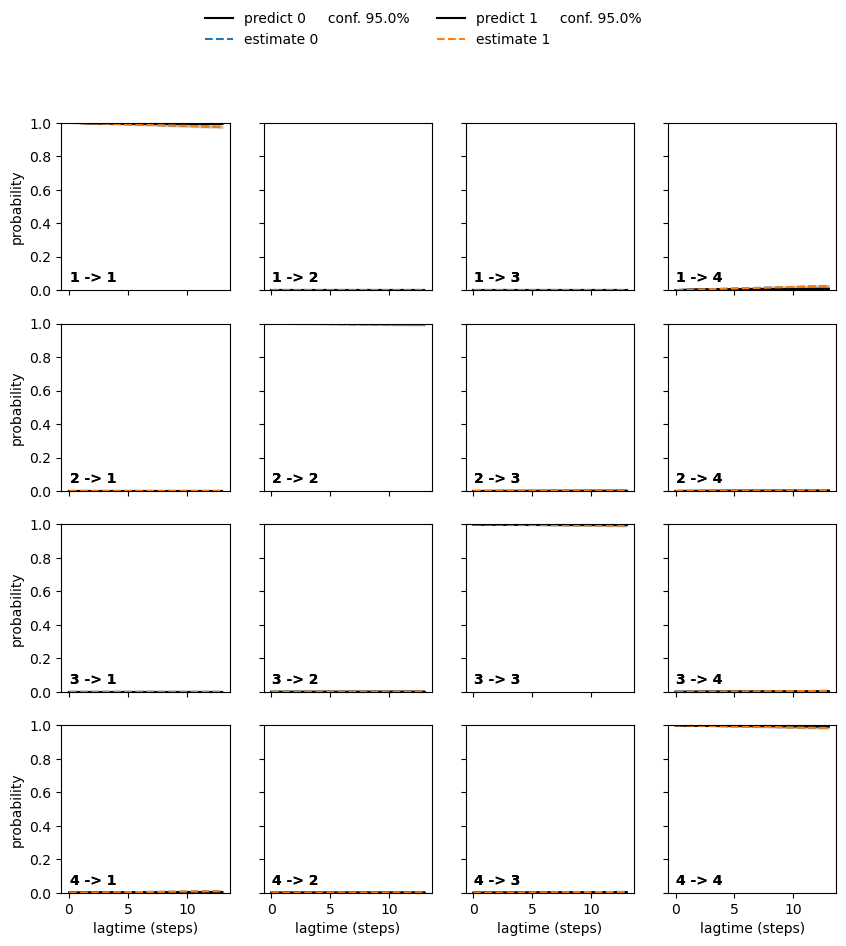

In [174]:
 models = []
 models2 = []
 for lag in [2, 3, 5, 13]:
     counts_estimator = TransitionCountEstimator(lagtime=lag, count_mode='effective')
     models.append(BayesianMSM().fit_fetch(counts_estimator.fit_fetch(dtraj_rec).submodel_largest()))
     models2.append(BayesianMSM().fit_fetch(counts_estimator.fit_fetch(dtraj_rec).submodel_largest()))

 test_model = models[0]
 ck_test = test_model.ck_test(models, n_metastable_sets=4)
 grid = plot_ck_test(ck_test, legend=False)

 test_model2 = models2[0]
 ck_test = test_model2.ck_test(models2, n_metastable_sets=4)
 plot_ck_test(ck_test, legend=True, grid=grid)

In [182]:
from deeptime.decomposition import VAMP

vamp_estimator = VAMP(lagtime=10, observable_transform=model)
vamp = vamp_estimator.fit(arr7).fetch_model()
print(f"VAMP-2 score under lag 10: s = {vamp.score(2).round(2)}")

VAMP-2 score under lag 10: s = 3.99


  0%|          | 0/19 [00:00<?, ?it/s]

Text(0, 0.5, 'timescale')

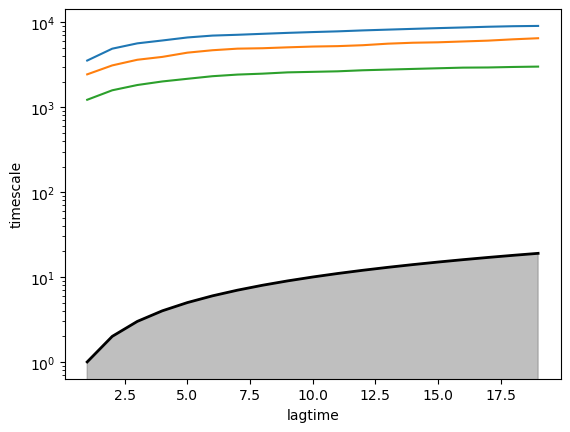

In [193]:

from deeptime.util.validation import implied_timescales, ck_test
from deeptime.plots import plot_implied_timescales, plot_ck_test

lagtimes = np.arange(1, 20, dtype=np.int32)
vamp_models = [VAMP(lagtime=lag, observable_transform=model).fit_fetch(arr7) for lag in tqdm(lagtimes)]

ax = plot_implied_timescales(implied_timescales(vamp_models))
ax.set_yscale('log')
ax.set_xlabel('lagtime')
ax.set_ylabel('timescale')


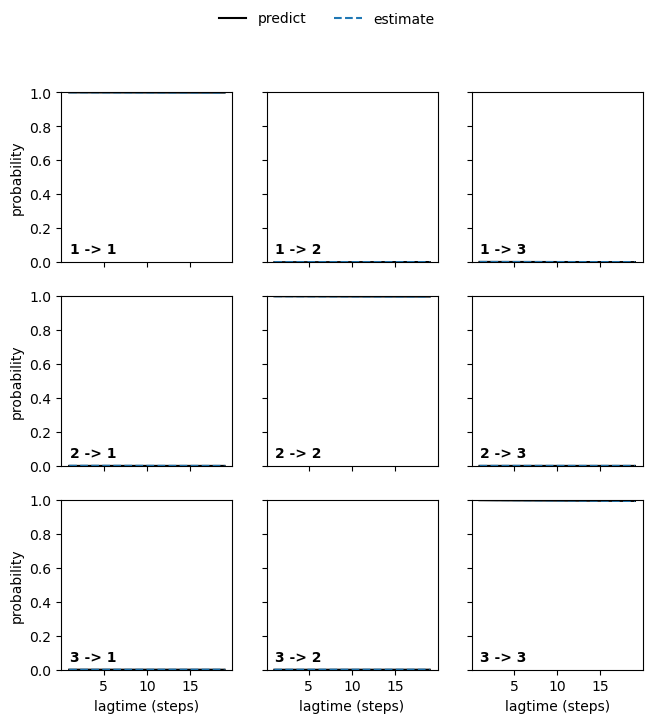

In [200]:
plot_ck_test(vamp_models[15].ck_test(vamp_models));

In [201]:
vamp = vamp_models[10]
print(vamp.lagtime)

11


In [202]:
from deeptime.clustering import KMeans
from deeptime.markov import TransitionCountEstimator
from deeptime.markov.msm import BayesianMSM


In [203]:
projections = [vamp.transform(traj) for traj in arr7]

In [204]:
cluster = KMeans(80, progress=tqdm).fit_fetch(projections)
dtrajs = [cluster.transform(x) for x in projections]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

In [205]:
bmsms = [BayesianMSM(lagtime=lag).fit_fetch(dtrajs) for lag in tqdm([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])]

  0%|          | 0/10 [00:00<?, ?it/s]

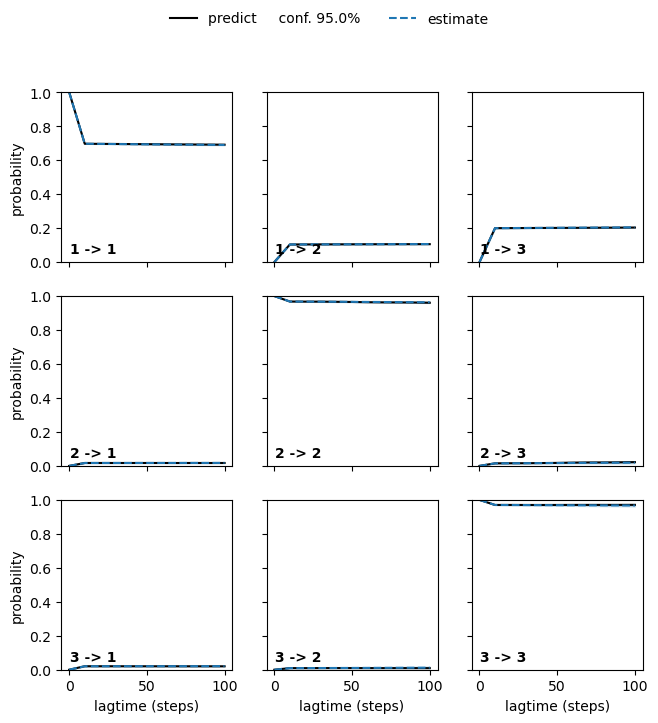

In [207]:
ck_test = bmsms[0].ck_test(bmsms, 3)
plot_ck_test(ck_test);

In [225]:
state_probabilities = model.transform(arr7)


In [226]:
assignments = state_probabilities

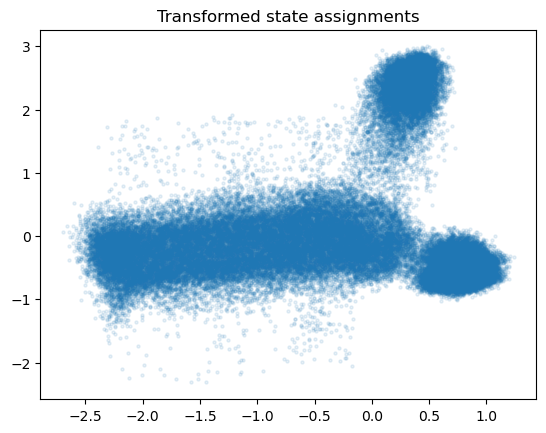

In [231]:

plt.scatter(*tica_concatenated[:,:2].T, s=5, alpha=.1)
plt.title('Transformed state assignments');

In [219]:
assignments

array([1, 1, 1, ..., 1, 1, 1])